In [2]:
import cv2
import glob
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

letter_dict = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, 
               "G":6, "H":7, "I":8, "K":10, "L":11, "M":12, 
               "N":13, "O":14, "P":15, "Q":16, "R":17, "S":18,
               "T":19, "U":20, "V":21, "W":22, "X":23, "Y":24}

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

# Load Keras Model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ASL/final_model")

#Plot Orginal Images
def plot_folder(folder_path):
  images = sorted(glob.glob(folder_path+"/*.*", recursive=True))

  f, ax = plt.subplots(6,4)
  f.set_size_inches(20, 20)

  i = 0
  while(i!=24):
    for j in range(6):
      for z in range(4):
        #matplotlib read images in RGB not BGR
        image =plt.imread(images[i])
        ax[j,z].imshow(image)
        ax[j,z].set_yticklabels([])
        ax[j,z].set_xticklabels([])
        ax[j,z].set_title(images[i][images[i].rfind('/')+1:])
        i=i+1
  plt.show()

#Multi_Images Test
def test_folder(folder_path):
  test_imgs = sorted(glob.glob(folder_path+"/*.*", recursive=True))

  test_df = pd.DataFrame()

  n = 256
  for i in tqdm(test_imgs,desc="Preprocessing Images",position=0):
    img = cv2.imread(i, 0)
    re = cv2.resize(img, (n, n))
    gaus = cv2.GaussianBlur(re,(5,5),2)
    adath = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, thr = cv2.threshold(adath, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    arr = np.asarray(thr).ravel()
    test_df = test_df.append([arr], ignore_index=True)

  test_arr = test_df.values.reshape(test_df.shape[0], n, n, 1)
  test_arr = test_arr.astype('float32')
  test_arr /= 255

  predictions = model.predict(test_arr)
  final_preds = np.argmax(predictions, axis=-1)

  y_true = np.array([],dtype='int64')

  for i in test_imgs:
    index = i.rfind('/')+1
    file_name = i[index:]
    y_true = np.append(y_true,letter_dict[file_name[0].upper()])

  correctly_classified = 0
  for i in range(len(y_true)):
    if final_preds[i] == y_true[i]:
      correctly_classified = correctly_classified + 1
  print('\n'+str(correctly_classified)+' images out of 24 have been correctly classified')

  accuracy = accuracy_score(y_true, final_preds)
  print('Accuracy Score = %', accuracy*100)

  f, ax = plt.subplots(6,4)
  f.set_size_inches(8, 8)

  i = 0
  while(i!=24):
    for j in range(6):
      for z in range(4):
        ax[j,z].imshow(test_df.iloc[i,:].values.reshape(n, n) , cmap = "gray")
        ax[j,z].set_yticklabels([])
        ax[j,z].set_xticklabels([])
        if y_true[i] != final_preds[i]:
          ax[j,z].set_title("Misclassified "+str(class_names[y_true[i]])+" as "+str(class_names[final_preds[i]]))
          i=i+1
        else:
          ax[j,z].set_title("Classified "+str(class_names[y_true[i]])+" as "+str(class_names[final_preds[i]]))
          i=i+1


#Single_Image Test
def test_image(image_path):
  n = 256
  img = cv2.imread(image_path, 0)
  re = cv2.resize(img, (n, n))
  gaus = cv2.GaussianBlur(re,(5,5),2)
  adath = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
  ret, thr = cv2.threshold(adath, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  plt.imshow(thr,cmap='gray')
  arr = np.asarray(thr).ravel()
  arr = arr.reshape(1, n, n, 1)
  arr = arr.astype('float32')
  arr = arr/255.0
  prediction = np.argmax(model.predict(arr), axis=-1)

  print("Predicted Label: ", class_names[int(prediction)])
  print("True Label: ", image_path[image_path.rfind('/')+1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Preprocessing Images: 100%|██████████| 24/24 [01:55<00:00,  4.82s/it]



24 images out of 24 have been correctly classified
Accuracy Score = % 100.0


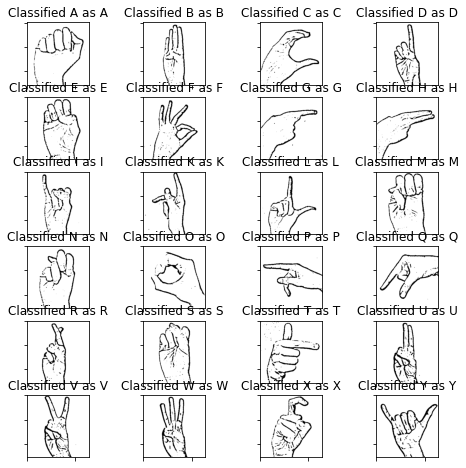

In [3]:
#plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor1')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor1')

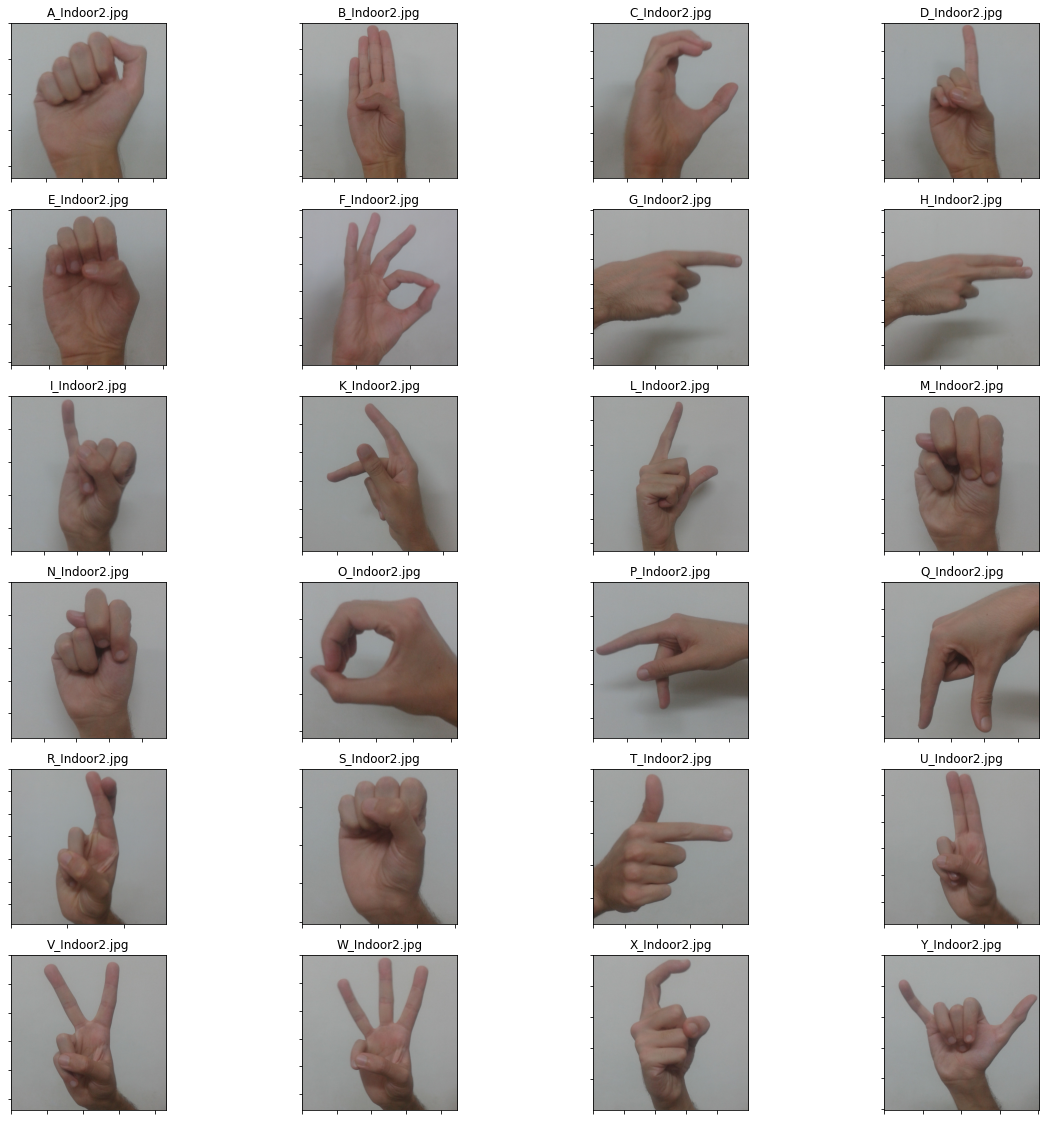

Preprocessing Images: 100%|██████████| 24/24 [02:07<00:00,  5.32s/it]



21 images out of 24 have been correctly classified
Accuracy Score = % 87.5


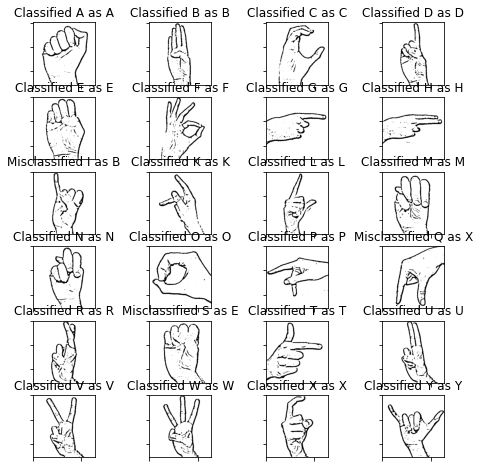

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor2')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor2')

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor3')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor3')

Preprocessing Images: 100%|██████████| 24/24 [02:00<00:00,  5.01s/it]



24 images out of 24 have been correctly classified
Accuracy Score = % 100.0


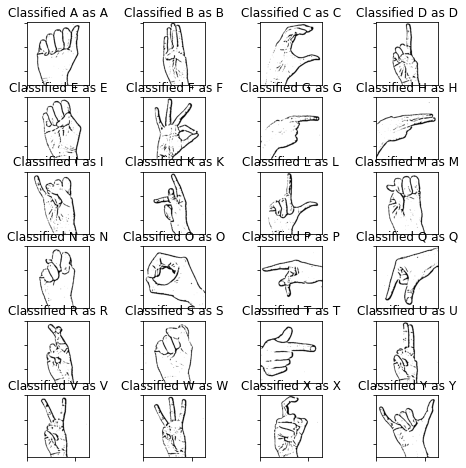

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor4')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor4')

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/IndoorLowLight')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/IndoorLowLight')

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/IndoorDarkRoomWithFlashLight')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/IndoorDarkRoomWithFlashLight')

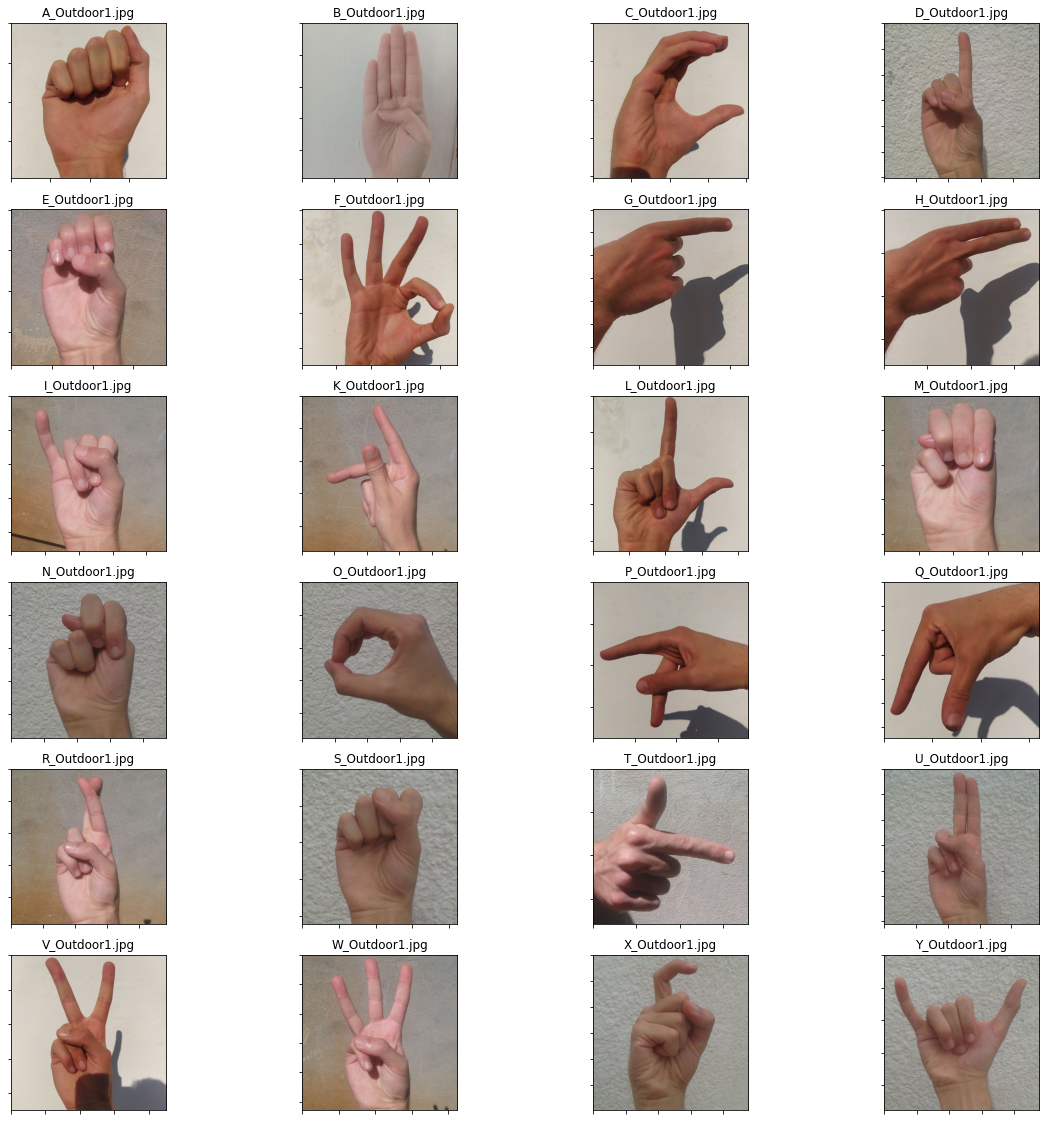

Preprocessing Images: 100%|██████████| 24/24 [01:58<00:00,  4.92s/it]



16 images out of 24 have been correctly classified
Accuracy Score = % 66.66666666666666


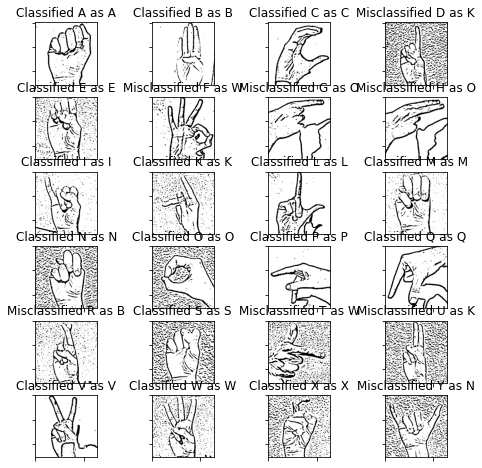

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Outdoor1')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Outdoor1')

In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Outdoor2')
test_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Outdoor2')

Predicted Label:  G
True Label:  G


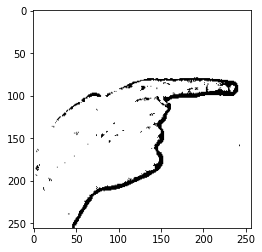

In [ ]:
test_image('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Indoor4/G_Indoor4.jpg')

In [ ]:
test_image('/content/drive/MyDrive/Colab Notebooks/ASL/old test images/AAAA.JPG')

SyntaxError: ignored

In [ ]:
#Total Results
test_imgs = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/**/*.*", recursive=True))

test_df = pd.DataFrame()

n = 256
for i in tqdm(test_imgs,desc="Preprocessing Images",position=0):
  img = cv2.imread(i, 0)
  re = cv2.resize(img, (n, n))
  gaus = cv2.GaussianBlur(re,(5,5),2)
  adath = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
  ret, thr = cv2.threshold(adath, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  arr = np.asarray(thr).ravel()
  test_df = test_df.append([arr], ignore_index=True)

test_arr = test_df.values.reshape(test_df.shape[0], n, n, 1)
test_arr = test_arr.astype('float32')
test_arr /= 255

predictions = model.predict(test_arr)
final_preds = np.argmax(predictions, axis=-1)

y_true = np.array([],dtype='int64')

for i in test_imgs:
  index = i.rfind('/')+1
  file_name = i[index:]
  y_true = np.append(y_true,letter_dict[file_name[0].upper()])

correctly_classified=0
for i in range(len(y_true)):
    if final_preds[i] == y_true[i]:
      correctly_classified = correctly_classified + 1
print(str(correctly_classified)+' images out of '+str(len(y_true))+' have been correctly classified')

accuracy = accuracy_score(y_true, final_preds)
print('Accuracy Score = %', accuracy*100)

result = pd.DataFrame(predictions,columns=['P('+i+')' for i in class_names])
result.insert(0,'File Name',[i[i.rfind('/')+1:] for i in test_imgs])
result.insert(1,'Correctly Classified',[y_true[i] == final_preds[i] for i in range(len(test_imgs))])
result.insert(2,'True Label',[class_names[i] for i in y_true])
result.insert(3,'Predicted Label',[class_names[i] for i in final_preds])

results_csv_path = '/content/drive/MyDrive/Colab Notebooks/ASL/Test_Results.csv'
result.to_csv(results_csv_path,index=False)
print('\nResults saved to '+results_csv_path+'\n')

Preprocessing Images:  47%|████▋     | 90/192 [07:12<08:13,  4.84s/it]

In [ ]:
import pandas as pd
result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASL/Test_Results.csv')

In [ ]:
result.loc[result['File Name'] == 'I_Indoor2.jpg']

,File Name,Correctly Classified,True Label,Predicted Label,P(A),P(B),P(C),P(D),P(E),P(F),P(G),P(H),P(I),P(J),P(K),P(L),P(M),P(N),P(O),P(P),P(Q),P(R),P(S),P(T),P(U),P(V),P(W),P(X),P(Y)
32,I_Indoor2.jpg,False,I,B,0.0000000138,0.6841197000,0.0000266322,0.0349771230,0.0000145568,0.0160712120,0.0000002786,0.0000000000,0.1138399200,0.0000000013,0.0107927880,0.0002759113,0.0000430308,0.0048778914,0.0000000847,0.0000118788,0.0050051096,0.0043128417,0.0018959164,0.0027616443,0.0017776362,0.0257270860,0.0719129900,0.0193195960,0.0022361130


In [ ]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [ ]:
pd.reset_option('display.float_format')